In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Stats_Learning_Final_Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Stats_Learning_Final_Project/test.csv')

In [ ]:
train = train.drop('Unnamed: 0', axis = 1)
test = test.drop('Unnamed: 0', axis = 1)

In [ ]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
X_train.head()

,GenHlth,NoDocCost,KidneyDisease,Married,HasInsurance,PhysHlthBad,MentHelthBad,Exercise,HighBP,HighChol,...,DrkGrnVegIntake,FrenchFryIntake,PotatoIntake,OtherVegIntake,Race_White,Race_Black,Race_Asian,Race_Native,Race_Hisp,Race_Other
0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,100.0,13.0,0.0,300.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14.0,3.0,0.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,...,43.0,43.0,13.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,43.0,0.0,2.0,100.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.columns

Index(['GenHlth', 'NoDocCost', 'KidneyDisease', 'Married', 'HasInsurance',
       'PhysHlthBad', 'MentHelthBad', 'Exercise', 'HighBP', 'HighChol',
       'HeartDisease', 'Sex', 'Height', 'Weight', 'EducationLvl', 'IncomeLvl',
       'SmokerLvl', 'HeavyDrinker', 'FruitJuiceIntake', 'FruitIntake',
       'DrkGrnVegIntake', 'FrenchFryIntake', 'PotatoIntake', 'OtherVegIntake',
       'Race_White', 'Race_Black', 'Race_Asian', 'Race_Native', 'Race_Hisp',
       'Race_Other'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


Logistic Regression

In [ ]:
log=LogisticRegression(multi_class='multinomial')

In [ ]:
LogisticRegression??

In [ ]:
log.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred_log=log.predict(X_test)

In [ ]:
np.array(confusion_matrix(y_test, y_pred_log))

array([[ 3474,  1482,  1891],
       [ 2909, 12233,  4817],
       [  392,   368,   369]])

In [ ]:
metrics.f1_score(y_test,y_pred_log,average='macro')

0.43956396122933405

In [ ]:
metrics.accuracy_score(y_test,y_pred_log)

0.5754787900483265

Text(0.5, 1.0, 'Multinomial Logistic Regression Confusion Matrix')

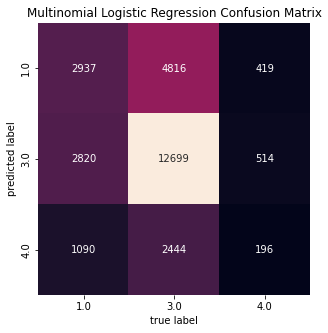

In [ ]:
mat = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Multinomial Logistic Regression Confusion Matrix')

In [ ]:
#CV
parameters_1og={'solver':('newton-cg','sag','saga'),
                'max_iter':([3])
              }
grid_log=GridSearchCV(
    estimator=log,
    param_grid=parameters_1og,
    scoring = 'accuracy',
    n_jobs = -1,
)

In [ ]:
grid_log.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(multi_class='multinomial'), n_jobs=-1,
             param_grid={'max_iter': [3],
                         'solver': ('newton-cg', 'sag', 'saga')},
             scoring='accuracy')

In [ ]:
y_pred_grid_log=grid_log.predict(X_test)

In [ ]:
np.array(confusion_matrix(y_test, y_pred_grid_log))

array([[ 3387,  1441,  2019],
       [ 2793, 12134,  5032],
       [  371,   357,   401]])

In [ ]:
metrics.f1_score(y_test,y_pred_grid_log,average='macro')

0.4383734872845472

In [ ]:
metrics.accuracy_score(y_test,y_pred_grid_log)

0.5699659924825488

Linear Discriminant Analysis

In [ ]:
scaler=StandardScaler(copy=True,with_mean=True,with_std=True)
col_names=['DrkGrnVegIntake','FrenchFryIntake','PotatoIntake','OtherVegIntake','Height','Weight','IncomeLvl','SmokerLvl','FruitJuiceIntake','FruitIntake']
X_train[col_names]=scaler.fit_transform(X_train[col_names])
X_test[col_names]=scaler.fit_transform(X_test[col_names])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
y_test

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
27930    3.0
27931    3.0
27932    1.0
27933    3.0
27934    3.0
Name: DiabetesStatus, Length: 27935, dtype: float64

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_pred=lda.predict(X_test)

In [ ]:
np.array(confusion_matrix(y_test, y_pred))

array([[ 3511,  1434,  1902],
       [ 3023, 12271,  4665],
       [  391,   367,   371]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
metrics.f1_score(y_test,y_pred,average='macro')
#metrics.precision_score(y_test,y_pred,average='macro')

0.4410069249626653

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.5782351888312153

Text(0.5, 1.0, 'LDA Confusion Matrix')

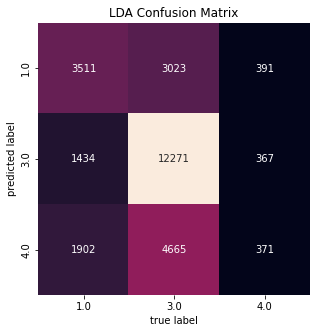

In [ ]:
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('LDA Confusion Matrix')

In [ ]:
#CV
parameters_1={'solver':('lsqr','eigen'),
              'shrinkage':(0.1,0.01,0.001),
              'tol':(0.1,0.001),
              'n_components': (1,2),
              'store_covariance': (True, False)
              }
grid_lda=GridSearchCV(
    estimator=lda,
    param_grid=parameters_1,
    scoring = 'accuracy',
    n_jobs = -1,
)

In [ ]:
GridSearchCV?

In [ ]:
lda_grid=grid_lda.fit(X_train,y_train)
y_pred_grid=lda_grid.predict(X_test)

In [ ]:
metrics.f1_score(y_test,y_pred_grid,average='macro')

0.4411873605411041

In [ ]:
lda_grid.best_score_

0.5549572273554355

In [ ]:
lda_grid.best_params_

{'n_components': 1,
 'shrinkage': 0.001,
 'solver': 'lsqr',
 'store_covariance': True,
 'tol': 0.1}

Text(0.5, 1.0, 'LDA Tuned Confusion Matrix')

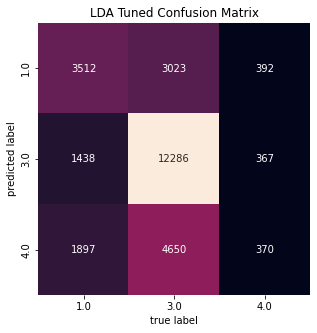

In [ ]:
mat = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('LDA Tuned Confusion Matrix')

Quadratic Discriminant Analysis

In [ ]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
y_pred_qda=qda.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:

metrics.f1_score(y_test,y_pred_qda,average='macro')

0.24903174407311576

In [ ]:
metrics.accuracy_score(y_test,y_pred_qda)

0.23454447825308752

Text(0.5, 1.0, 'QDA Confusion Matrix')

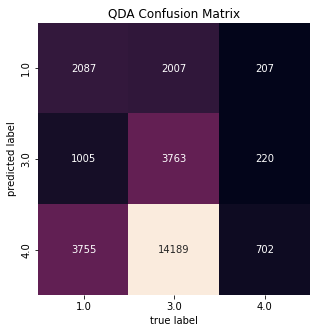

In [ ]:
mat = confusion_matrix(y_test, y_pred_qda)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('QDA Confusion Matrix')

In [ ]:
qda_1=QuadraticDiscriminantAnalysis()

In [ ]:
parameters_2 = {'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1),
                'store_covariance': (True, False),
                'tol': (0.0001, 0.001,0.01, 0.1)
                   }
qda_grid=GridSearchCV(
    estimator=qda_1,
    param_grid=parameters_2,
    scoring = 'accuracy',
    n_jobs = -1,
)

In [ ]:
qda_grid.fit(X_train,y_train)
y_pred_qda_grid=qda_grid.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
metrics.accuracy_score(y_test,y_pred_qda_grid)

0.23916234114909612

In [ ]:
metrics.f1_score(y_test,y_pred_qda_grid,average='macro')

0.25363785030395464

In [ ]:
qda_grid.best_score_

0.44890318861044926

Text(0.5, 1.0, 'QDA Tuned Confusion Matrix')

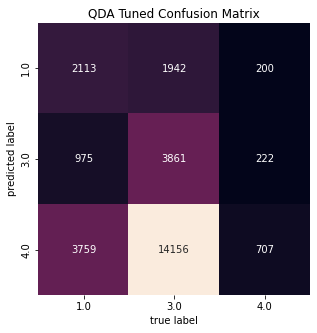

In [ ]:
mat = confusion_matrix(y_test, y_pred_qda_grid)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('QDA Tuned Confusion Matrix')

In [ ]:
metrics.accuracy_score(y_test,y_pred_qda_grid)

0.23916234114909612